In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats 
from matplotlib import pyplot as plt

In [7]:
data_bmw = pd.read_csv(r'I:\Python\dataSet\ml\cars\bmw.csv')
data_titanic = pd.read_csv(r'I:\Python\dataSet\ml\titanic\train.csv')

In [8]:
display(data_bmw.head())
display(data_titanic.head())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  Bernoulli Distribution

* This distribution is related to Binary classification . (i.e What is the probability that this person is sick or not? Or what is the probability that this customer will buy the product or not and so on)
#### Example:
* In titanic dataset we want to know What is the probability that a person on the ship will survive?

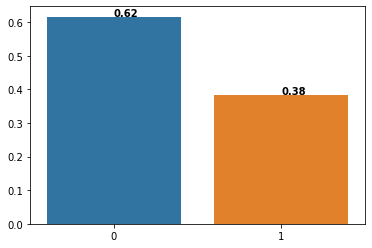

In [67]:
data_survive = data_titanic['Survived'].value_counts(normalize=True)
fig, ax = plt.subplots()
sns.barplot(x=data_survive.index, y=data_survive.values)
for i, v in enumerate(data_survive):
    ax.text(i, v+0.002, round(v, 2), fontweight='bold')
plt.show() 

# Binomial distribution

* Binomial distribution is one of the most popular distributions in statistics, along with normal distribution. Binomial distribution is a discrete probability distribution of a number of successes (X) in a sequence of independent experiments (n). Each experiment has two possible outcomes: success and failure. Success outcome has a probability p, and failure has probability (1−p). 
 #### Example:
* What is the probability of finding 1 or more men in the sample?
* First you must calculate the probability of men and this parameter (p) then assume number of (x) from 0 to 5 and assume your n = 10 .
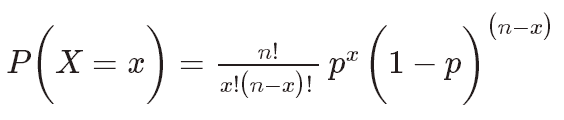

In [11]:
data_men = data_titanic[data_titanic['Survived'] == 1]
data_men['Sex'].value_counts(normalize=True)
# The probalbbility of female in data is 0.681287 and male is 0.318713

female    0.681287
male      0.318713
Name: Sex, dtype: float64

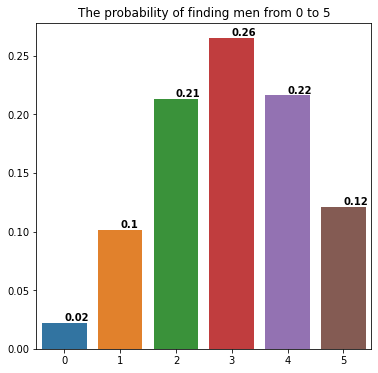

In [48]:
# Parameters of equation
p = 0.318
n = 10
x = np.arange(0, 6)
# Probability mass function (a function that gives the probability that a discrete random variable is exactly equal to some value)
pmf_men = stats.binom.pmf(k = x, n = n, p = p)
# plot the result
# plt.bar(x, pmf_men)
fig, ax = plt.subplots(figsize=(6,6))
g = sns.barplot(x=x, y=pmf_men)
for i, v in enumerate(pmf_men):
    ax.text(i, v + .002, round(v, 2), fontweight='bold')
g.set_title('The probability of finding men from 0 to 5')
plt.show()
# The probability of finding men from 0 to 5 

# Poisson Distribution

* It is a probability disceret distribution that is used to show how many times an event is likely to occur over a specified period.
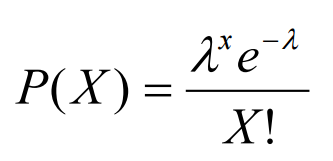
#### Example 1:
* A store sells 3 apples per day on average. What is the probability that they will sell 5 apples on a given day?  in this case we will use the Poisson distribution
#### Example 2:
* A certain store sells 15 cans of tuna per day on average. What is the probability that this store sells more than 20 cans of tuna in a given day?

[0.04978707 0.14936121 0.22404181 0.22404181 0.16803136 0.10081881]


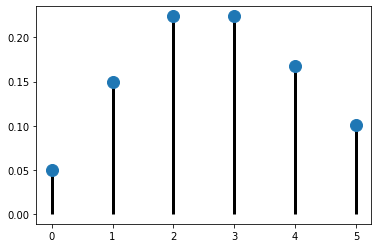

In [82]:
mu = 3
x = np.arange(0, 6)
pmf_poisson = stats.poisson.pmf(x, mu = mu)
print(pmf_poisson)
plt.plot(x, pmf_poisson, 'o', ms=12)
plt.vlines(x, 0 , pmf_poisson , colors='Black' , lw = 3)
plt.show()

[0.99999969 0.99999511 0.99996069 0.99978862 0.99914336 0.99720757
 0.9923681  0.98199781 0.96255351 0.93014634 0.88153559 0.8152482
 0.73238897 0.63678216 0.53434629 0.43191042 0.3358768  0.25114125
 0.18052829 0.12478122 0.08297091]


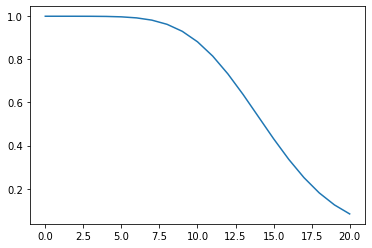

In [109]:
mu = 15
x = np.arange(0, 21)
pmf_poisson = 1 - stats.poisson.cdf( k = x, mu = mu)
print(pmf_poisson)
plt.plot(x, pmf_poisson)
plt.show()

# Exponential Distribution

* The probability of time between Poisson events. 
# F(x; λ) = 1 – e-λx
##### where:
 * λ: the rate parameter (calculated as λ = 1/μ)
 * e: A constant roughly equal to 2.718
#### Example:
* Suppose the mean number of minutes between eruptions for a certain geyser is 40 minutes. What is the probability that we’ll have to wait less than 50 minutes for an eruption?

The probability that we’ll have to wait less than 50 minutes for the next eruption is [0.         0.02469009 0.04877058 0.07225651 0.09516258 0.1175031
 0.13929202 0.16054298 0.18126925 0.20148378 0.22119922 0.24042788
 0.25918178 0.27747265 0.29531191 0.31271072 0.32967995 0.34623021
 0.36237185 0.37811494 0.39346934 0.40844464 0.42305019 0.43729513
 0.45118836 0.46473857 0.47795422 0.49084358 0.5034147  0.51567543
 0.52763345 0.53929622 0.55067104 0.56176501 0.57258507 0.58313798
 0.59343034 0.60346858 0.61325898 0.62280765 0.63212056 0.64120353
 0.65006225 0.65870224 0.66712892 0.67534753 0.68336323 0.69118102
 0.69880579 0.7062423 ]


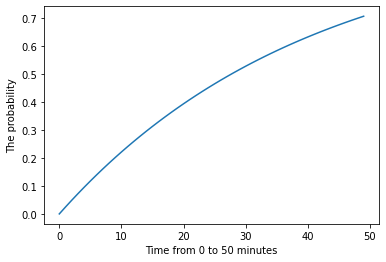

In [115]:
mu = 40
x = np.arange(50)
cdf_expon = stats.expon.cdf(x = x, scale = mu)
print(f'The probability that we’ll have to wait less than 50 minutes for the next eruption is {cdf_expon}')
plt.plot(x,cdf_expon)
plt.ylabel('The probability')
plt.xlabel('Time from 0 to 50 minutes')
plt.show()

# Normal Distribution

* The normal distribution is a continuous probability distribution that is symmetrical around its mean, most of the observations cluster around the central peak. in Normal distribution the mean is equal to median . it's also known as the Gaussian distribution.
#### Example 1:
* In titanic data we need to know :What is the percentage of people age less than 20?
#### Example 2:
* In titanic data we need to know :What is 65% of ages from people?

0.6424111732357382


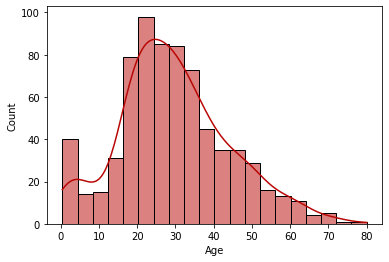

In [200]:
data_age = data_titanic['Age']
mean = data_age.mean()
std = data_age.std()

norm_age_cdf = stats.norm.cdf(35, mean, std)
print(norm_age_cdf)

sns.set_palette('OrRd_r')
sns.histplot(data_age, kde=True)
plt.show()

In [202]:
norm_age_ppf = stats.norm.ppf(0.65, mean, std)
print(norm_age_ppf)

35.29647437442206
